In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [169]:
data=pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data Cleaning**

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [171]:
# dropping unncessary columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [172]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [173]:
# renaming columns
data=data.rename(columns={'v1':'target','v2':'Email'})
data.head()

,target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [174]:
data.isna().sum()

target    0
Email     0
dtype: int64

In [175]:
data.duplicated().sum()

403

In [176]:
# Dropping duplicate values
data=data.drop_duplicates()

**EDA**

In [177]:
labels=data['target'].unique()

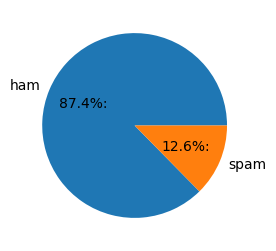

In [178]:
plt.figure(figsize=(4,3))
plt.pie(x=data['target'].value_counts(),labels=labels,autopct='%1.1f%%:')
plt.show()

In [179]:
# checking total characters in each email
data['num_characters']=data['Email'].apply(len)

In [180]:
# checking for no of words in each email
data['num_words']=data['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [181]:

# checking for no of sentences in each mail
data['num_sentences']=data['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [182]:
data.head()

,target,Email,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [183]:
# stats for not spam Emails
data[data['target']=='ham'].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [184]:
# stats for spam Emails
data[data['target']=='spam'].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [185]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [186]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: >

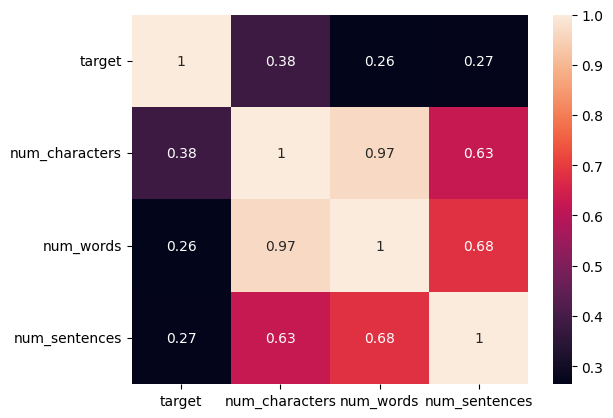

In [187]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

**Preprocessing**


In [188]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [190]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation and stopwords, and perform stemming
    transformed_tokens = [ps.stem(token) for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    

    return " ".join(transformed_tokens)

In [191]:
data['Email_transformed']=data['Email'].apply(transform_text)

In [192]:
data.head()

,target,Email,num_characters,num_words,num_sentences,Email_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Feature Selection

In [212]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfid = TfidfVectorizer()
X = tfid.fit_transform(data['Email_transformed']).toarray()

In [213]:
y=data['target']

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [216]:
model=MultinomialNB()

In [217]:
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time
print("Training Time:", train_time)

Training Time: 0.05539870262145996


Model Evaluation

In [218]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9451966473243069


<Axes: >

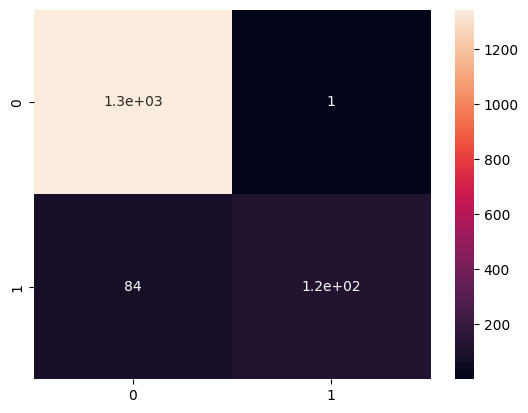

In [219]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True)

In [220]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [221]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)


GaussianNB()

In [222]:

y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8594455190199871


<Axes: >

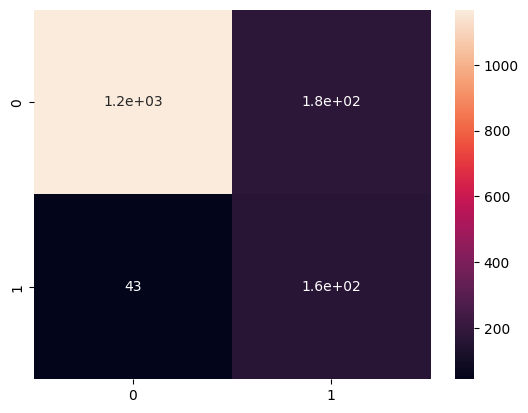

In [223]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True)

In [224]:
nb_classifier = BernoulliNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9593810444874274


**Conclusion**

**Best Model** is
MultinomialNB with accuarcy of 97.43 %

Prediction on test data

In [225]:
actual_inverse = encoder.inverse_transform(y_test)
predicted_inverse =encoder.inverse_transform(y_pred)

# Creating a new DataFrame with inverse transformed values
actual_vs_predicted = pd.DataFrame({'Actual': actual_inverse, 'Predicted': predicted_inverse})

In [226]:
actual_vs_predicted.head()

,Actual,Predicted
0,ham,ham
1,ham,ham
2,spam,spam
3,ham,ham
4,ham,ham


Predcition on user input

In [227]:
import joblib

In [238]:
model_1=joblib.load('/kaggle/working/nb_classifier.joblib')
tfid=joblib.load('/kaggle/working/tfid.joblib')

In [239]:
input_email = input('Enter Email: ')

# Preprocess the user input
preprocessed_input = [transform_text(input_email)]

# Vectorize the preprocessed input using the already fitted vectorizer
preprocessed_input_vectorized =tfid.transform(preprocessed_input)

# Make predictions
prediction = model_1.predict(preprocessed_input_vectorized)

# Print the result
if prediction == 0:
    print('ham')
else:
    print('spam')

Enter Email:  input_email =input('Enter Email') # Preprocess the user input preprocessed_input = [transform_text(input_email)]  # Vectorize tDon't miss out on our exclusive offer! Get 50% off your next purchase when you shop with us today. Limited time onlyhe preprocessed input preprocessed_input_vectorized = vectorizer.fit_transform(preprocessed_input) print('') # Make predictions prediction = model_1.predict(preprocessed_input_vectorized) if prediction==0:     print('ham') else:     print('spam')


ham


saving best model

In [233]:
from joblib import dump

# Assuming your model is named 'model'
dump(nb_classifier, 'nb_classifier.joblib')
dump(tfid, 'tfid.joblib')

['tfid.joblib']

In [ ]:
dump(transform_text, 'preprocess_fn.joblib')